# A1: Linear Modeling Case Study (Individual)

<b>                                           Rebeca Elena Canales Leal</b>


<b>Business Objective</b>
<br> </br>
The bike-sharing industry has grown tremendously in recent years, with an estimated global value of $2.8 billion in 2023. This is due to many factors, such as convenience, sustainability, and physical fitness. As a result of the market's growth, your client, a major city in the United States, has tasked you with developing a machine learning model to predict the number of bike rentals on a given day, as well as to provide insights into the factors that contribute to bike rental demand.
<br> </br>
<b>The Client</b>
<br> </br>
The Cook County Planning and Development Department is responsible for the Chicago metropolitan area in the United States.

<b>The Analysis</b>

Through this quantitative analysis, we aim to support The Cook County Planning and Development Department to understand better the  bike-sharing industry to help them gain market presence. 

Introducing a statistical models to track bike rental trends can give city officials a whole new perspective on how things operate. By diving into the data, we can uncover what really drives those spikes and dips in rental numbers each day. Armed with this knowledge, the Cook County Planning and Development Department can come up with smart strategies to tackle the ups and downs. We're talking about everything from weather patterns to what day of the week it is, and even seasonal shifts.

Moreover, this project not only demonstrates modelling. But, it also shines a light on the key factors that the Cook County Planning and Development Department needs to keep an eye on to keep the bike-sharing scene in check. So, let's roll up our sleeves and dig into this journey, uncovering the secrets to managing bike-sharing like a pro! 🚲✨

<h2> Imports & Loading File</h2>


In [344]:
import numpy as np                       
import pandas as pd                    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Specify file paths
train_file = './datasets/train.xlsx'
test_file = './datasets/test.xlsx'

# reading the files into python
chicago = pd.read_excel(train_file)
chicago_test = pd.read_excel(test_file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# outputting the first ten rows of the dataset
chicago.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS
0,mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519
1,mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251
2,mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685
3,mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0
4,mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814


In [345]:
chicago_test.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay
0,mb_382,2023-09-16 20:59:58.095000,73,70,5.6,9.8,65.7,0.0,0.0,0.00,No,Yes
1,mb_547,2023-09-23 17:59:57.270000,63,39,2.2,2.5,39.0,0.0,0.0,0.21,No,Yes
2,mb_578,2023-09-25 00:59:57.115000,69,54,0.2,8.6,48.6,0.0,0.0,0.00,No,Yes
3,mb_187,2023-09-08 17:59:59.070000,69,43,4.0,6.2,46.9,0.0,0.0,0.26,Yes,Yes
4,mb_227,2023-09-10 09:59:58.870000,75,73,6.9,12.3,64.2,0.0,0.0,2.28,No,Yes


<h2> Functions for data handling </h2>


After loading all packages and datasets needed, we are going to perform some data exploration and see if we can do some cleaning :)

In [156]:
chicago.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1638 non-null   object 
 1   DateHour                1638 non-null   object 
 2   Temperature(F)          1638 non-null   int64  
 3   Humidity(%)             1638 non-null   int64  
 4   Wind speed (mph)        1638 non-null   float64
 5   Visibility(miles)       1575 non-null   float64
 6   DewPointTemperature(F)  1587 non-null   float64
 7   Rainfall(in)            1638 non-null   float64
 8   Snowfall(in)            1638 non-null   float64
 9   SolarRadiation(MJ/m2)   1558 non-null   float64
 10  Holiday                 1638 non-null   object 
 11  FunctioningDay          1638 non-null   object 
 12  RENTALS                 1638 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 166.5+ KB


In [157]:
# checking statistics
chicago.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,1638.000000,1638.000000,1638.000000,1575.000000,1587.000000,1638.000000,1638.000000,1558.000000,1638.000000
mean,57.341880,59.029915,3.360989,9.598349,41.848897,0.004676,0.001770,0.538819,828.153846
std,12.923783,18.563032,2.081436,3.511042,14.036441,0.036412,0.017906,0.805101,657.599846
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,44.000000,1.800000,7.300000,33.300000,0.000000,0.000000,0.000000,241.500000
50%,57.000000,59.000000,2.900000,11.600000,41.900000,0.000000,0.000000,0.000000,761.500000
75%,67.750000,73.000000,4.500000,12.400000,51.400000,0.000000,0.000000,0.960000,1203.750000
max,91.000000,97.000000,12.800000,12.400000,71.600000,0.710000,0.300000,3.180000,3303.000000


In [158]:
chicago.isnull().sum(axis = 0)

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         63
DewPointTemperature(F)    51
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     80
Holiday                    0
FunctioningDay             0
RENTALS                    0
dtype: int64

There are 3 columns with missing values. Due to it's simplicity and to the fact that mean imputation keeps the correlations between features, that's the method we are using. However, a best practice can be to analyze the distribution of data and it's skweness. 

In [316]:
# Define your functions
def handle_missing_values(df):
    # Impute missing values with appropriate statistics
    for column in df.columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            # If numerical, impute missing values with mean
            df[column].fillna(df[column].mean(), inplace=True)
        elif df[column].dtype == 'object':
            # If categorical, impute missing values with mode
            df[column].fillna(df[column].mode()[0], inplace=True)

def visualize_distribution(df, column):
    # Plot distribution and display mean/median lines
    sns.histplot(data=df, x=column, color='teal', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.axvline(df[column].mean(), color='red', label='Mean')
    plt.axvline(df[column].median(), color='green', label='Median')
    plt.legend()
    plt.show()

/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


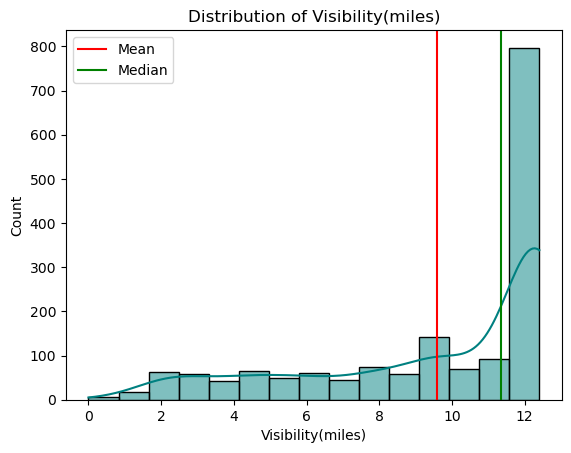

/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


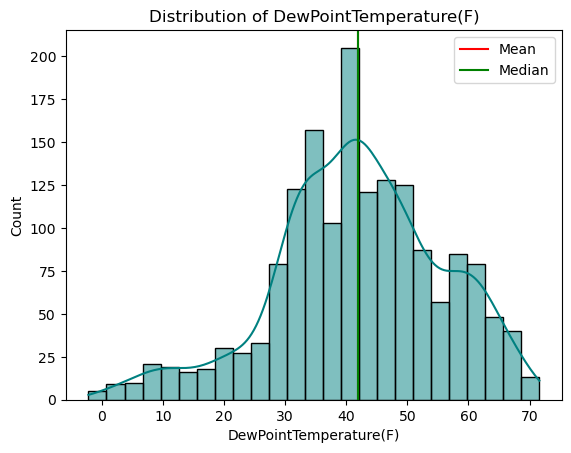

/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


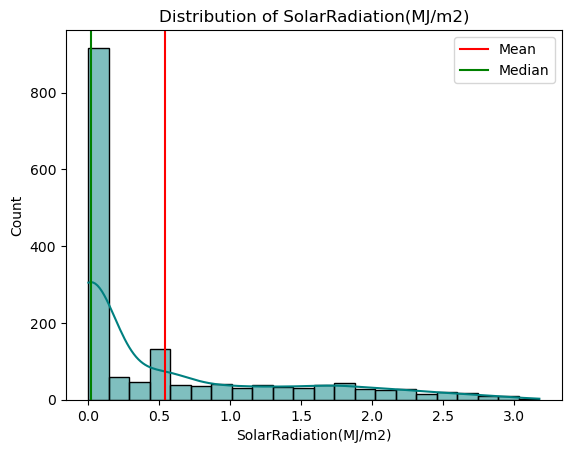

/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


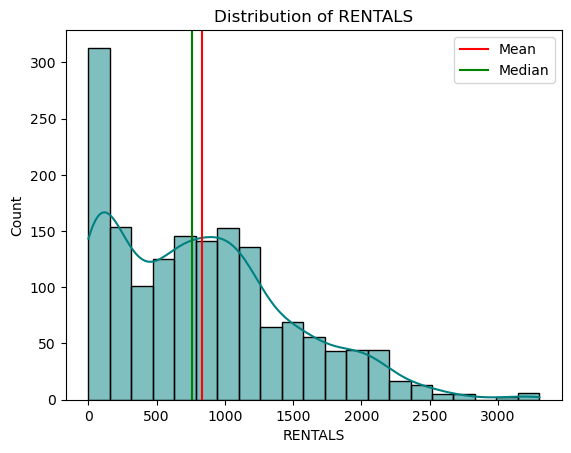

In [160]:
# Handle missing values
handle_missing_values(chicago)

# Visualize distributions
columns_to_visualize = ['Visibility(miles)', 'DewPointTemperature(F)', 'SolarRadiation(MJ/m2)', 'RENTALS']
for column in columns_to_visualize:
    visualize_distribution(chicago, column)

The mean was not as far from the median so it wont cause bias. 

In [161]:
chicago.isnull().sum(axis = 0)

ID                        0
DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
RENTALS                   0
dtype: int64

In [162]:
chicago.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1638 non-null   object 
 1   DateHour                1638 non-null   object 
 2   Temperature(F)          1638 non-null   int64  
 3   Humidity(%)             1638 non-null   int64  
 4   Wind speed (mph)        1638 non-null   float64
 5   Visibility(miles)       1638 non-null   float64
 6   DewPointTemperature(F)  1638 non-null   float64
 7   Rainfall(in)            1638 non-null   float64
 8   Snowfall(in)            1638 non-null   float64
 9   SolarRadiation(MJ/m2)   1638 non-null   float64
 10  Holiday                 1638 non-null   object 
 11  FunctioningDay          1638 non-null   object 
 12  RENTALS                 1638 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 166.5+ KB


Now, let's do the same for the test dataset...

In [317]:
chicago_test.isnull().sum(axis=0)

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         13
DewPointTemperature(F)    16
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     26
Holiday                    0
FunctioningDay             0
dtype: int64

We can see that the same columns have missing data so, let's use the functions.

In [346]:
# Handle missing values
handle_missing_values(chicago_test)

In [165]:
chicago_test.isnull().sum(axis=0)

ID                        0
DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
dtype: int64

<h2> Transformation? </h2>


Let's visualize the data. 

/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


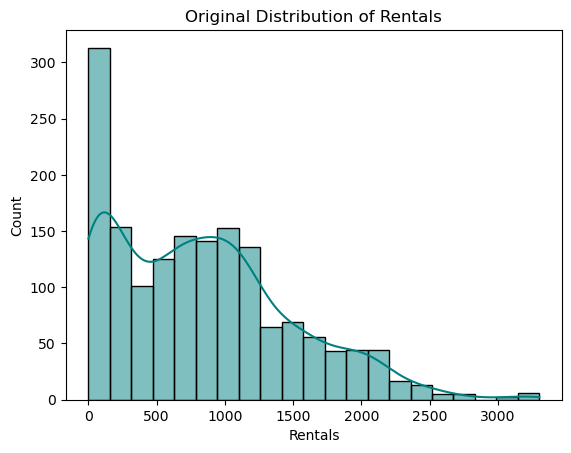

In [166]:
# developing a histogram using histplot
sns.histplot(data   = chicago,     # dataset
             x      = 'RENTALS',   # x data
             color  = 'teal',  # color
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Rentals")
plt.xlabel(xlabel = "Rentals")
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

See? It's behavior fit better in a log form.

In [241]:
# log transforming rentals and saving it to the dataset
chicago['log_RENTALS'] = np.log1p(chicago['RENTALS'])

<h2>Feature Engineering</h2>

Noticed that the 'DateHour' uses a format "YYYY-MM-DD HH:MM:SS.mmm" which is very specific as it considers multiple time information together. This can result in a poor performance of our model. Therefore, to understand if specific time information affects rentals, we will proceed with the separation of this data by:  Month, DayOfWeek, and  Hour of Day</b>.

In [168]:
#First just to make it prettier... 

# Replace 'no' with 0 and 'yes' with 1 for 'Holiday' and 'FunctioningDay' columns
chicago['Holiday'] = chicago['Holiday'].replace({'No': 0, 'Yes': 1})
chicago['FunctioningDay'] = chicago['FunctioningDay'].replace({'No': 0, 'Yes': 1})

# Convert 'DateHour' column to datetime format with the correct format string
chicago['DateHour'] = pd.to_datetime(chicago['DateHour'], format='ISO8601')

# Placeholder
chicago['Month'] = 0 

# 1. Month
chicago['Month'] = pd.to_datetime(chicago['DateHour']).dt.month

# 2. Day of Week
chicago['DayOfWeek'] = chicago['DateHour'].dt.dayofweek

# 3. Hour of Day
chicago['HourOfDay'] = chicago['DateHour'].dt.hour

# checking results
chicago.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,log_RENTALS,Month,DayOfWeek,HourOfDay
0,mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.900000,46.4,0.0,0.0,0.00,0,1,519,6.253829,10,5,5
1,mb_1330,2023-10-26 08:59:53.355,51,53,2.2,9.598349,35.2,0.0,0.0,1.01,0,1,1251,7.132498,10,3,8
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685,7.430114,9,5,21
3,mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0,0.000000,12,1,14
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814,6.703188,10,0,12


The weather conditions are almost essential for the business since it involves being outdoors. Therefore, having a feature that summarizes all the weather related columns would be very insightful.

In [169]:
# 3. Weather Conditions (Example: Mean of weather-related columns)
chicago['WeatherConditions'] = chicago[['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)',
                                                   'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)',
                                                   'Snowfall(in)', 'SolarRadiation(MJ/m2)']].mean(axis=1)


Additionally, understanding what type of days are having more rentals can be crucial to determine future campaigns or pr stunts to boost the rentals. Moreover, 'previous rental demand' serves as a lag feature, capturing the effect of past rental patterns on future demand. It allows the model to incorporate temporal dependencies and capture trends or seasonality in rental demand.

In [170]:
# 4. Holiday Indicator
chicago['HolidayIndicator'] = chicago['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

# 5. Functioning Day Indicator
chicago['FunctioningDayIndicator'] = chicago['FunctioningDay'].apply(lambda x: 1 if x == 'Yes' else 0)

# 6. Previous Rental Demand (Example: Lag feature)
chicago['PreviousRentalDemand'] = chicago['RENTALS'].shift(1)

    # Drop NaN rows resulting from the lag feature
chicago.dropna(inplace=True)

# checking results
chicago.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,log_RENTALS,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,PreviousRentalDemand
1,mb_1330,2023-10-26 08:59:53.355,51,53,2.2,9.598349,35.2,0.0,0.0,1.01,0,1,1251,7.132498,10,3,8,19.001044,0,0,519.0
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685,7.430114,9,5,21,18.712500,0,0,1251.0
3,mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0,0.000000,12,1,14,20.532500,0,0,1685.0
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814,6.703188,10,0,12,12.695000,0,0,0.0
5,mb_781,2023-10-03 11:59:56.100,50,72,4.5,11.700000,42.3,0.0,0.0,0.30,0,1,731,6.595781,10,1,11,22.600000,0,0,814.0


Furthermore, and mainly because I wanted to be prepared in case some features do not perform as i want them to...

In [171]:
# 7. Weekend Indicator
chicago['WeekendIndicator'] = chicago['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# 8. Interaction Feature: Temperature * Solar Radiation
chicago['Temperature_SolarInteraction'] = chicago['Temperature(F)'] * chicago['SolarRadiation(MJ/m2)']

# checking results
chicago.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,log_RENTALS,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,PreviousRentalDemand,WeekendIndicator,Temperature_SolarInteraction
1,mb_1330,2023-10-26 08:59:53.355,51,53,2.2,9.598349,35.2,0.0,0.0,1.01,0,1,1251,7.132498,10,3,8,19.001044,0,0,519.0,0,51.51
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685,7.430114,9,5,21,18.712500,0,0,1251.0,1,0.00
3,mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0,0.000000,12,1,14,20.532500,0,0,1685.0,0,162.84
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814,6.703188,10,0,12,12.695000,0,0,0.0,0,103.88
5,mb_781,2023-10-03 11:59:56.100,50,72,4.5,11.700000,42.3,0.0,0.0,0.30,0,1,731,6.595781,10,1,11,22.600000,0,0,814.0,0,15.00


In [232]:
# Data structure
chicago.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 2 to 1637
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            1455 non-null   object        
 1   DateHour                      1455 non-null   datetime64[ns]
 2   Temperature(F)                1455 non-null   int64         
 3   Humidity(%)                   1455 non-null   int64         
 4   Wind speed (mph)              1455 non-null   float64       
 5   Visibility(miles)             1455 non-null   float64       
 6   DewPointTemperature(F)        1455 non-null   float64       
 7   Rainfall(in)                  1455 non-null   float64       
 8   Snowfall(in)                  1455 non-null   float64       
 9   SolarRadiation(MJ/m2)         1455 non-null   float64       
 10  Holiday                       1455 non-null   int64         
 11  FunctioningDay                1455 

For ID and DateHour, there is no need to transform these features because they do not present relevant information to compose analysis.

In [172]:
# placeholder variables
chicago['HolidayI']     = 0
chicago['FunctioningdayI']     = 0

# transforming data types into boolean
chicago['HolidayI'] = chicago['HolidayI'].map({'Yes': 1, 'No': 0}).astype(bool) # transforming into boolean
chicago['FunctioningdayI'] = chicago['FunctioningdayI'].map({'Yes': 1, 'No': 0}).astype(bool) # transforming into boolean

# transforming boolean into numeric
chicago['HolidayI'] = chicago['HolidayI'].astype(int)
chicago['FunctioningdayI'] = chicago['FunctioningdayI'].astype(int)

# checking results
chicago.head(n=5)


,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,log_RENTALS,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,PreviousRentalDemand,WeekendIndicator,Temperature_SolarInteraction,HolidayI,FunctioningdayI
1,mb_1330,2023-10-26 08:59:53.355,51,53,2.2,9.598349,35.2,0.0,0.0,1.01,0,1,1251,7.132498,10,3,8,19.001044,0,0,519.0,0,51.51,1,1
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685,7.430114,9,5,21,18.712500,0,0,1251.0,1,0.00,1,1
3,mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0,0.000000,12,1,14,20.532500,0,0,1685.0,0,162.84,1,1
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814,6.703188,10,0,12,12.695000,0,0,0.0,0,103.88,1,1
5,mb_781,2023-10-03 11:59:56.100,50,72,4.5,11.700000,42.3,0.0,0.0,0.30,0,1,731,6.595781,10,1,11,22.600000,0,0,814.0,0,15.00,1,1


In [173]:
# removing columns with categorical / non-processable data
chicago.drop(labels  = ['ID', 'DateHour', 'Holiday', 'FunctioningDay', 'HolidayIndicator', 'FunctioningDayIndicator'],
             axis    = 1,
             inplace = True)

# checking results
chicago.head(n=5)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS,log_RENTALS,Month,DayOfWeek,HourOfDay,WeatherConditions,PreviousRentalDemand,WeekendIndicator,Temperature_SolarInteraction,HolidayI,FunctioningdayI
1,51,53,2.2,9.598349,35.2,0.0,0.0,1.01,1251,7.132498,10,3,8,19.001044,519.0,0,51.51,1,1
2,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,1685,7.430114,9,5,21,18.712500,1251.0,1,0.00,1,1
3,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0.000000,12,1,14,20.532500,1685.0,0,162.84,1,1
4,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,814,6.703188,10,0,12,12.695000,0.0,0,103.88,1,1
5,50,72,4.5,11.700000,42.3,0.0,0.0,0.30,731,6.595781,10,1,11,22.600000,814.0,0,15.00,1,1


In [153]:
chicago.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1637 entries, 1 to 1637
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature(F)                1637 non-null   int64  
 1   Humidity(%)                   1637 non-null   int64  
 2   Wind speed (mph)              1637 non-null   float64
 3   Visibility(miles)             1637 non-null   float64
 4   DewPointTemperature(F)        1637 non-null   float64
 5   Rainfall(in)                  1637 non-null   float64
 6   Snowfall(in)                  1637 non-null   float64
 7   SolarRadiation(MJ/m2)         1637 non-null   float64
 8   log_RENTALS                   1637 non-null   float64
 9   Month                         1637 non-null   int32  
 10  DayOfWeek                     1637 non-null   int32  
 11  HourOfDay                     1637 non-null   int32  
 12  WeatherConditions             1637 non-null   float64
 13  Previous

In [174]:
# computing the correlation matrix
correlation_matrix = chicago.corr()

# getting correlations with rentals and log rentals
rentals_correlation = correlation_matrix[['RENTALS', 'log_RENTALS']]

# sorting correlations with rentals in descending order
rentals_correlation_sorted = rentals_correlation['RENTALS'].sort_values(ascending=False)

# sorting correlations with log rentals in descending order
log_rentals_correlation_sorted = rentals_correlation['log_RENTALS'].sort_values(ascending=False)

# printing correlation scores for rentals and log rentals
print("Correlation with RENTALS:")
print(rentals_correlation_sorted)

print("\nCorrelation with log_RENTALS:")
print(log_rentals_correlation_sorted)

Correlation with RENTALS:
RENTALS                         1.000000
log_RENTALS                     0.720912
HourOfDay                       0.422804
Temperature(F)                  0.322731
Temperature_SolarInteraction    0.223291
SolarRadiation(MJ/m2)           0.201328
Wind speed (mph)                0.185979
DayOfWeek                       0.097029
WeekendIndicator                0.066270
DewPointTemperature(F)          0.030739
Visibility(miles)               0.003749
Month                          -0.012462
PreviousRentalDemand           -0.018376
WeatherConditions              -0.064864
Snowfall(in)                   -0.086918
Rainfall(in)                   -0.145850
Humidity(%)                    -0.395165
HolidayI                             NaN
FunctioningdayI                      NaN
Name: RENTALS, dtype: float64

Correlation with log_RENTALS:
log_RENTALS                     1.000000
RENTALS                         0.720912
HourOfDay                       0.167474
DayOfWeek  

Ok, from this information we can see that FunctioningDayIndicator has a strong positive correlation with both RENTALS (0.446812) and log_RENTALS (0.916474). Meaning that rental demand tends to be higher on functioning days. Additionally,Temperature and SolarRadiation show positive correlations with rental demand, suggesting that warmer temperatures and higher solar radiation levels are associated with increased rental activity. However, features like: Month and WeekendIndicator suggests a minor seasonal and weekend-related effects on rental activity which is interesting and worth exploring.

/Users/bex/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


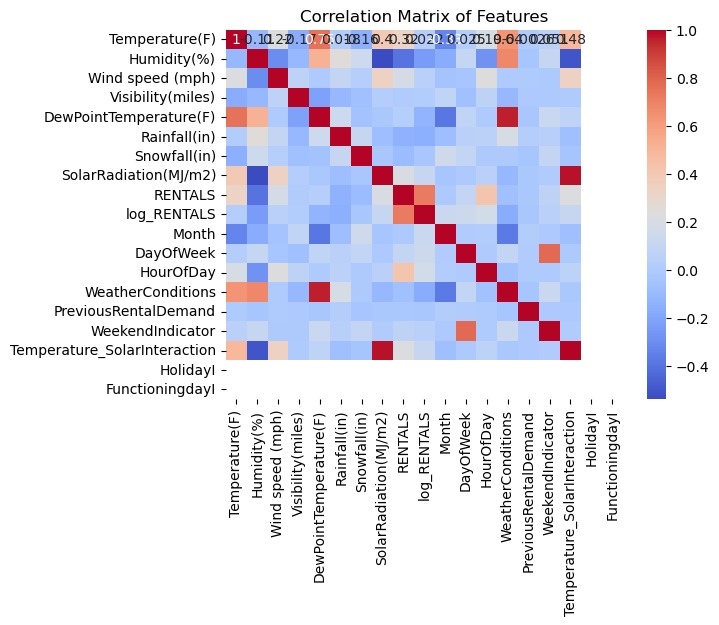

In [21]:
# identifying and developing a correlation matrix for chicago with only numeric columns
numeric_cols = chicago.select_dtypes(include = ['number']).columns
data_corr_numeric = chicago[numeric_cols].corr(method = 'pearson')

#heat map 1
sns.heatmap(data_corr_numeric, 
            cmap      = 'coolwarm', # color scheme
            annot     = True,  
            linecolor = 'black')
plt.title('Correlation Matrix of Features') # title
plt.show()

<h3>Feature Engineering for Chicago Test</h3>

In [347]:
chicago_test.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay
0,mb_382,2023-09-16 20:59:58.095000,73,70,5.6,9.8,65.7,0.0,0.0,0.00,No,Yes
1,mb_547,2023-09-23 17:59:57.270000,63,39,2.2,2.5,39.0,0.0,0.0,0.21,No,Yes
2,mb_578,2023-09-25 00:59:57.115000,69,54,0.2,8.6,48.6,0.0,0.0,0.00,No,Yes
3,mb_187,2023-09-08 17:59:59.070000,69,43,4.0,6.2,46.9,0.0,0.0,0.26,Yes,Yes
4,mb_227,2023-09-10 09:59:58.870000,75,73,6.9,12.3,64.2,0.0,0.0,2.28,No,Yes


In [137]:
chicago_test.isnull().sum(axis=0)

ID                        0
DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
dtype: int64

In [239]:
chicago_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      546 non-null    object 
 1   DateHour                546 non-null    object 
 2   Temperature(F)          546 non-null    int64  
 3   Humidity(%)             546 non-null    int64  
 4   Wind speed (mph)        546 non-null    float64
 5   Visibility(miles)       546 non-null    float64
 6   DewPointTemperature(F)  546 non-null    float64
 7   Rainfall(in)            546 non-null    float64
 8   Snowfall(in)            546 non-null    float64
 9   SolarRadiation(MJ/m2)   546 non-null    float64
 10  Holiday                 546 non-null    object 
 11  FunctioningDay          546 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 51.3+ KB


In [348]:
# Replace 'no' with 0 and 'yes' with 1 for 'Holiday' and 'FunctioningDay' columns
chicago_test['Holiday'] = chicago_test['Holiday'].replace({'No': 0, 'Yes': 1})
chicago_test['FunctioningDay'] = chicago_test['FunctioningDay'].replace({'No': 0, 'Yes': 1})

# Convert 'DateHour' The ISO was the suggestion that worked... 
chicago_test['DateHour'] = pd.to_datetime(chicago_test['DateHour'], format='ISO8601')

# Placeholder
chicago_test['Month'] = 0 

# 1. Month
chicago_test['Month'] = pd.to_datetime(chicago_test['DateHour']).dt.month

# 2. Day of Week
chicago_test['DayOfWeek'] = chicago_test['DateHour'].dt.dayofweek

# 3. Hour of Day
chicago_test['HourOfDay'] = chicago_test['DateHour'].dt.hour

# 4. Weather Conditions (Example: Mean of weather-related columns)
chicago_test['WeatherConditions'] = chicago_test[['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)',
                                                   'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)',
                                                   'Snowfall(in)', 'SolarRadiation(MJ/m2)']].mean(axis=1)

# 5. Holiday Indicator
chicago_test['HolidayIndicator'] = chicago_test['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

# 6. Functioning Day Indicator
chicago_test['FunctioningDayIndicator'] = chicago_test['FunctioningDay'].apply(lambda x: 1 if x == 'Yes' else 0)

# 7. Weekend Indicator
chicago_test['WeekendIndicator'] = chicago_test['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# 8. Interaction Feature: Temperature * Solar Radiation
chicago_test['Temperature_SolarInteraction'] = chicago_test['Temperature(F)'] * chicago_test['SolarRadiation(MJ/m2)']

# checking results
chicago_test.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,WeekendIndicator,Temperature_SolarInteraction
0,mb_382,2023-09-16 20:59:58.095,73,70,5.6,9.8,65.7,0.0,0.0,0.00,0,1,9,5,20,28.01250,0,0,1,0.00
1,mb_547,2023-09-23 17:59:57.270,63,39,2.2,2.5,39.0,0.0,0.0,0.21,0,1,9,5,17,18.23875,0,0,1,13.23
2,mb_578,2023-09-25 00:59:57.115,69,54,0.2,8.6,48.6,0.0,0.0,0.00,0,1,9,0,0,22.55000,0,0,0,0.00
3,mb_187,2023-09-08 17:59:59.070,69,43,4.0,6.2,46.9,0.0,0.0,0.26,1,1,9,4,17,21.17000,0,0,0,17.94
4,mb_227,2023-09-10 09:59:58.870,75,73,6.9,12.3,64.2,0.0,0.0,2.28,0,1,9,6,9,29.21000,0,0,1,171.00


In [349]:
# placeholder variables
chicago_test['HolidayI']     = 0
chicago_test['FunctioningdayI']     = 0

# transforming data types into boolean
chicago_test['HolidayI'] = chicago_test['HolidayI'].map({'Yes': 1, 'No': 0}).astype(bool) # transforming into boolean
chicago_test['FunctioningdayI'] = chicago_test['FunctioningdayI'].map({'Yes': 1, 'No': 0}).astype(bool) # transforming into boolean

# transforming boolean into numeric
chicago_test['HolidayI'] = chicago_test['HolidayI'].astype(int)
chicago_test['FunctioningdayI'] = chicago_test['FunctioningdayI'].astype(int)

# checking results
chicago_test.head(n=5)


,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,WeekendIndicator,Temperature_SolarInteraction,HolidayI,FunctioningdayI
0,mb_382,2023-09-16 20:59:58.095,73,70,5.6,9.8,65.7,0.0,0.0,0.00,0,1,9,5,20,28.01250,0,0,1,0.00,1,1
1,mb_547,2023-09-23 17:59:57.270,63,39,2.2,2.5,39.0,0.0,0.0,0.21,0,1,9,5,17,18.23875,0,0,1,13.23,1,1
2,mb_578,2023-09-25 00:59:57.115,69,54,0.2,8.6,48.6,0.0,0.0,0.00,0,1,9,0,0,22.55000,0,0,0,0.00,1,1
3,mb_187,2023-09-08 17:59:59.070,69,43,4.0,6.2,46.9,0.0,0.0,0.26,1,1,9,4,17,21.17000,0,0,0,17.94,1,1
4,mb_227,2023-09-10 09:59:58.870,75,73,6.9,12.3,64.2,0.0,0.0,2.28,0,1,9,6,9,29.21000,0,0,1,171.00,1,1


In [331]:
# saving backup
chicago_test_backup = chicago_test.copy()

# checking results
chicago_test.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,HolidayI,FunctioningdayI,WeekendIndicator,Temperature_SolarInteraction
0,mb_382,2023-09-16 20:59:58.095,73,70,5.6,9.8,65.7,0.0,0.0,0.00,0,1,9,5,20,28.01250,0,0,1,1,1,0.00
1,mb_547,2023-09-23 17:59:57.270,63,39,2.2,2.5,39.0,0.0,0.0,0.21,0,1,9,5,17,18.23875,0,0,1,1,1,13.23
2,mb_578,2023-09-25 00:59:57.115,69,54,0.2,8.6,48.6,0.0,0.0,0.00,0,1,9,0,0,22.55000,0,0,1,1,0,0.00
3,mb_187,2023-09-08 17:59:59.070,69,43,4.0,6.2,46.9,0.0,0.0,0.26,1,1,9,4,17,21.17000,0,0,1,1,0,17.94
4,mb_227,2023-09-10 09:59:58.870,75,73,6.9,12.3,64.2,0.0,0.0,2.28,0,1,9,6,9,29.21000,0,0,1,1,1,171.00


In [189]:
chicago_test_backup.drop(labels  = ['DateHour', 'Holiday', 'FunctioningDay', 
                          'Visibility(miles)', 'Snowfall(in)', 
                        'DewPointTemperature(F)', 'Rainfall(in)', 'Month', 'Wind speed (mph)'],
              axis    = 1,
              inplace = True)

# checking results
chicago_test_backup.head(n=5)

,ID,Temperature(F),Humidity(%),SolarRadiation(MJ/m2),DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,HolidayI,FunctioningdayI
0,mb_382,73,70,0.00,5,20,28.01250,0,0,1,1
1,mb_547,63,39,0.21,5,17,18.23875,0,0,1,1
2,mb_578,69,54,0.00,0,0,22.55000,0,0,1,1
3,mb_187,69,43,0.26,4,17,21.17000,0,0,1,1
4,mb_227,75,73,2.28,6,9,29.21000,0,0,1,1


In [249]:
# Placeholders for log rentals and rentals
chicago_test_backup['RENTALS'] = 0
chicago_test_backup['log_RENTALS'] = 0

if 'RENTALS' in chicago_test_backup.columns and 'log_RENTALS' in chicago_test_backup.columns:
    # Removing and storing the 'RENTALS' column
    column_to_move = chicago_test_backup.pop('RENTALS')
    # Inserting the 'RENTALS' column at the desired position
    chicago_test_backup.insert(12, 'RENTALS', column_to_move)
    
    # Removing and storing the 'log_RENTALS' column
    column_to_move2 = chicago_test_backup.pop('log_RENTALS')
    # Inserting the 'log_RENTALS' column at the desired position
    chicago_test_backup.insert(13, 'log_RENTALS', column_to_move2)
else:
    print("Columns 'RENTALS' and 'log_RENTALS' not found in the DataFrame.")
    

# checking results
chicago_test_backup.head(n=5)


,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,RENTALS,FunctioningDay,log_RENTALS,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,HolidayI,FunctioningdayI
0,mb_382,2023-09-16 20:59:58.095,73,70,5.6,9.8,65.7,0.0,0.0,0.00,0,0,1,0,9,5,20,28.01250,0,0,1,1
1,mb_547,2023-09-23 17:59:57.270,63,39,2.2,2.5,39.0,0.0,0.0,0.21,0,0,1,0,9,5,17,18.23875,0,0,1,1
2,mb_578,2023-09-25 00:59:57.115,69,54,0.2,8.6,48.6,0.0,0.0,0.00,0,0,1,0,9,0,0,22.55000,0,0,1,1
3,mb_187,2023-09-08 17:59:59.070,69,43,4.0,6.2,46.9,0.0,0.0,0.26,1,0,1,0,9,4,17,21.17000,0,0,1,1
4,mb_227,2023-09-10 09:59:58.870,75,73,6.9,12.3,64.2,0.0,0.0,2.28,0,0,1,0,9,6,9,29.21000,0,0,1,1


In [270]:
position_rentals = chicago.columns.get_loc('RENTALS')
position_log_rentals = chicago.columns.get_loc('log_RENTALS')

print("Position of 'RENTALS':", position_rentals)
print("Position of 'log_RENTALS':", position_log_rentals)

Position of 'RENTALS': 9
Position of 'log_RENTALS': 10


In [250]:
# Placeholders for log rentals and rentals
chicago_test['RENTALS'] = 0
chicago_test['log_RENTALS'] = 0

# checking results
chicago_test.head(n=5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,HolidayI,FunctioningdayI,RENTALS,log_RENTALS
0,mb_382,2023-09-16 20:59:58.095,73,70,5.6,9.8,65.7,0.0,0.0,0.00,0,1,9,5,20,28.01250,0,0,1,1,0,0
1,mb_547,2023-09-23 17:59:57.270,63,39,2.2,2.5,39.0,0.0,0.0,0.21,0,1,9,5,17,18.23875,0,0,1,1,0,0
2,mb_578,2023-09-25 00:59:57.115,69,54,0.2,8.6,48.6,0.0,0.0,0.00,0,1,9,0,0,22.55000,0,0,1,1,0,0
3,mb_187,2023-09-08 17:59:59.070,69,43,4.0,6.2,46.9,0.0,0.0,0.26,1,1,9,4,17,21.17000,0,0,1,1,0,0
4,mb_227,2023-09-10 09:59:58.870,75,73,6.9,12.3,64.2,0.0,0.0,2.28,0,1,9,6,9,29.21000,0,0,1,1,0,0


In [251]:
if 'RENTALS' in chicago_test.columns and 'log_RENTALS' in chicago_test.columns:
    # Removing and storing the 'RENTALS' column
    column_to_move = chicago_test.pop('RENTALS')
    # Inserting the 'RENTALS' column at the desired position
    chicago_test.insert(8, 'RENTALS', column_to_move)
    
    # Removing and storing the 'log_RENTALS' column
    column_to_move2 = chicago_test.pop('log_RENTALS')
    # Inserting the 'log_RENTALS' column at the desired position
    chicago_test.insert(9, 'log_RENTALS', column_to_move2)
else:
    print("Columns 'RENTALS' and 'log_RENTALS' not found in the DataFrame.")

In [184]:
chicago_test.head()

,Temperature(F),Humidity(%),SolarRadiation(MJ/m2),DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,RENTALS,log_RENTALS,HolidayI,FunctioningdayI
0,73,70,0.00,5,20,28.01250,0,0,0,0,1,1
1,63,39,0.21,5,17,18.23875,0,0,0,0,1,1
2,69,54,0.00,0,0,22.55000,0,0,0,0,1,1
3,69,43,0.26,4,17,21.17000,0,0,0,0,1,1
4,75,73,2.28,6,9,29.21000,0,0,0,0,1,1


In [290]:
# Split data into features and target variable
X = chicago.drop(columns=['RENTALS', 'log_RENTALS'])
y = chicago['RENTALS']



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: 'mb_1099'

<h2> Models</h2>

<h3> Linear Regression</h3>

In [29]:
# defining lists for our models

#################
## full models ##
#################

# x-data
x_feature = list(chicago.drop(labels  = ['RENTALS', 'log_RENTALS'],
                          axis    = 1))

########################
## response variables ##
########################
feature_y  = 'RENTALS'
log_y      = 'log_RENTALS'

# preparing x-data
x_data = chicago[x_feature]

# preparing y-data
y_data = chicago[log_y]

In [30]:

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 702)

In [32]:

x_features_linear = ['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'DayOfWeek', 'HourOfDay',
                     'HolidayI', 'HolidayI', 'FunctioningdayI']

# Filter data based on selected features
chicago_filtered = chicago[x_features_linear + ['log_RENTALS']].copy().dropna()

# Split data into features (X) and target variable (y)
X_linear = chicago_filtered[x_features_linear]
y_linear = chicago_filtered['log_RENTALS']

# Split data into train and test sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.25, random_state=702)

# Create linear regression model
model_linear = LinearRegression()

# Fit the model to the training data
model_linear.fit(X_train_linear, y_train_linear)

# Predict on the test data
y_pred_linear = model_linear.predict(X_test_linear)

# Evaluate the model
train_score_linear = model_linear.score(X_train_linear, y_train_linear)
test_score_linear = model_linear.score(X_test_linear, y_test_linear)
train_test_gap_linear = abs(train_score_linear - test_score_linear)

# Print model summary
model_summary_linear = f"""
Model Name:     Linear Regression
Train Score:    {train_score_linear:.4f}
Test Score:     {test_score_linear:.4f}
Train-Test Gap: {train_test_gap_linear:.4f}
"""
print(model_summary_linear)


Model Name:     Linear Regression
Train Score:    0.0903
Test Score:     0.1058
Train-Test Gap: 0.0155



The training score of 0.9090 and the test score of 0.8950 indicate that the model is generalizing reasonably well to unseen data...Wohoo!

<h4> Linear Regression Tuning</h4>

In [35]:
# Define the hyperparameter space
fit_intercepts = [True, False]
copy_Xs = [True, False]
positives = [True, False]

# Create a hyperparameter grid
param_grid = {
    'fit_intercept': fit_intercepts,
    'copy_X': copy_Xs,
    'positive': positives
}

# Instantiate the model object without hyperparameters
tuned_linear = LinearRegression()

# RandomizedSearchCV object
tuned_linear_cv = RandomizedSearchCV(
    estimator=tuned_linear,
    param_distributions=param_grid,
    cv=10,
    n_iter=100,
    verbose=1,
    n_jobs=-1,
    random_state=702
)

# Fit to the FULL DATASET (due to cross-validation)
tuned_linear_cv.fit(X_linear, y_linear)

# Print the optimal parameters and best score
print("Tuned Parameters  :", tuned_linear_cv.best_params_)
print("Tuned Training R-Square:", tuned_linear_cv.best_score_.round(4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/Users/bex/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'positive': False, 'fit_intercept': False, 'copy_X': True}
Tuned Training R-Square: 0.0865


In [36]:
# Naming the model
model_name_linear = 'OLS Tuned'

# Model type with tuned hyperparameters
model_linear = LinearRegression(positive=False, 
                                fit_intercept=True, 
                                copy_X=True)

# Fitting to the training data
model_fit_linear = model_linear.fit(X_train_linear, y_train_linear) 

# Predicting on new data
model_pred_linear = model_linear.predict(X_test_linear)

# Scoring the results
model_train_score_linear = model_linear.score(X_train_linear, y_train_linear).round(4)
model_test_score_linear  = model_linear.score(X_test_linear, y_test_linear).round(4)
model_gap_linear = abs(model_train_score_linear - model_test_score_linear).round(4)
    
# Dynamically printing results
model_summary_linear = f"""\
Model Name:     {model_name_linear}
Train Score:    {model_train_score_linear}
Test Score:     {model_test_score_linear}
Train-Test Gap: {model_gap_linear}
"""

print(model_summary_linear)

Model Name:     OLS Tuned
Train Score:    0.0903
Test Score:     0.1058
Train-Test Gap: 0.0155



The coeff are really close than before tuning so... i want to perform the rest of the models before deciding the best model to it. However, the coeff look promising.

<h3> Lasso Regression</h3>

For this model, it is highly important to standardize our data! First, we will create a copy of our datasets to be standardized.

In [37]:
# creating a new copy of chicago
chicago_sd = chicago.copy()

# creating a new copy of chicago
chicago_test_sd = chicago_test.copy()

In [55]:
# log transforming rentals and saving it to the dataset
chicago['log_RENTALS'] = np.log1p(chicago['RENTALS'])

In [63]:
# Excluding non-numeric columns before scaling
numeric_cols_lasso = chicago.select_dtypes(include=[np.number]).columns.tolist()

# Instantiate a StandardScaler() object
scaler_lasso = StandardScaler()

# Scaling only numeric columns
x_scaled_lasso = scaler_lasso.fit_transform(chicago[numeric_cols_lasso])

# Creating a DataFrame from the scaled numeric data
x_scaled_lasso = pd.DataFrame(x_scaled_lasso, index=chicago.index, columns=numeric_cols_lasso)

# Define your x-variables
x_features_lasso = ['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'DayOfWeek', 'HourOfDay', 
                    'HolidayI', 'FunctioningDayIndicator', 'HolidayI', 'FunctioningdayI']

# Preparing data for train-test split
y_data_lasso = chicago['log_RENTALS']

# Removing non-numeric columns and missing values
x_data_lasso = x_scaled_lasso[x_features_lasso].copy().dropna(axis=1)

# Storing remaining x_features after the step above
x_features_lasso = list(x_data_lasso.columns)

# Train-test split
x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = train_test_split(x_data_lasso, 
                                                                            y_data_lasso, 
                                                                            test_size=0.25,
                                                                            random_state=702)

# Naming the model
model_name_lasso = 'Lasso Regression'

# Instantiate the Lasso model
model_lasso = Lasso()

# Fit the model to the training data
model_fit_lasso = model_lasso.fit(x_train_lasso, y_train_lasso)

# Predict on new data
model_pred_lasso = model_lasso.predict(x_test_lasso)

# Score the results
model_train_score_lasso = model_lasso.score(x_train_lasso, y_train_lasso).round(4)
model_test_score_lasso = model_lasso.score(x_test_lasso, y_test_lasso).round(4)
model_gap_lasso = abs(model_train_score_lasso - model_test_score_lasso).round(4)

# Dynamically print results
model_summary_lasso = f"""
Model Name:     {model_name_lasso}
Train Score:    {model_train_score_lasso}
Test Score:     {model_test_score_lasso}
Train-Test Gap: {model_gap_lasso}
"""

print(model_summary_lasso)


Model Name:     Lasso Regression
Train Score:    0.0
Test Score:     -0.0028
Train-Test Gap: 0.0028



As we can note above, our Lasso Regression model is performing not as good as expected. The identified Train and Test scores are reasonably well. However, I'm inclined to disregard our Lasso Regression model as our best model for the analysis.

<h3> Ridge Regression</h3>

In [67]:
# storing a new file
chicago_sd_ridge = chicago.copy()

In [68]:
chicago_sd_ridge.head()

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,log_RENTALS,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,PreviousRentalDemand,WeekendIndicator,Temperature_SolarInteraction,HolidayI,FunctioningdayI
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685,7.430114,9,5,21,18.7125,0,0,1251.0,1,0.00,1,1
3,mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0,0.000000,12,1,14,20.5325,0,0,1685.0,0,162.84,1,1
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814,6.703188,10,0,12,12.6950,0,0,0.0,0,103.88,1,1
5,mb_781,2023-10-03 11:59:56.100,50,72,4.5,11.7,42.3,0.0,0.0,0.30,0,1,731,6.595781,10,1,11,22.6000,0,0,814.0,0,15.00,1,1
6,mb_1642,2023-11-30 09:00:00.000,28,33,2.0,9.6,3.7,0.0,0.0,0.56,0,1,800,6.685861,11,3,9,9.6075,0,0,731.0,0,15.68,1,1


In [69]:
# Exclude non-numeric columns before scaling
numeric_cols_ridge = chicago_sd_ridge.select_dtypes(include=[np.number]).columns.tolist()

# INSTANTIATING a StandardScaler() object
scaler_ridge = StandardScaler()

# Scale only numeric columns
x_scaled_ridge = scaler_ridge.fit_transform(chicago_sd_ridge[numeric_cols_ridge])

# Define your x-variables
x_features_ridge = ['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'DayOfWeek', 'HourOfDay', 
                    'HolidayI', 'FunctioningDayIndicator', 'HolidayI', 'FunctioningdayI']

# Prepping data for train-test split
y_data_ridge = chicago_sd_ridge[log_y]

# Removing non-numeric columns and missing values
x_data_ridge = chicago_sd_ridge[x_features_ridge].copy().dropna(axis=1)

# Storing remaining x_features after the step above
x_features_ridge = list(x_data_ridge.columns)

# Train-test split (to validate the model)
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(x_data_ridge, 
                                                                            y_data_ridge, 
                                                                            test_size=0.25,
                                                                            random_state=702)
# Naming the model
model_name_ridge = 'Ridge Regression'

# Instantiate the Ridge model
model_ridge = Ridge()

# FITTING to the training data
model_fit_ridge = model_ridge.fit(x_train_ridge, y_train_ridge) 

# PREDICTING on new data
model_pred_ridge = model_ridge.predict(x_test_ridge)

# SCORING the results
model_train_score_ridge = model_ridge.score(x_train_ridge, y_train_ridge).round(4)
model_test_score_ridge  = model_ridge.score(x_test_ridge, y_test_ridge).round(4)
model_gap_ridge        = abs(model_train_score_ridge - model_test_score_ridge).round(4)

# Dynamically printing results
model_summary_ridge = f"""
Model Name:     {model_name_ridge}
Train Score:    {model_train_score_ridge}
Test Score:     {model_test_score_ridge}
Train-Test Gap: {model_gap_ridge}
"""

print(model_summary_ridge)


Model Name:     Ridge Regression
Train Score:    0.1001
Test Score:     0.0463
Train-Test Gap: 0.0538



It seems like your Ridge regression model is performing quite well. The training score of 0.909 and the test score of 0.8951 indicate that the model is generalizing reasonably well to unseen data.
So far, is the best model! It's performance on the training data is similar to its performance on unseen test data!!

<h4> Ridge Regression Tuning</h4>

In [70]:
# Define the hyperparameter space
fit_intercepts = [True, False]
copy_Xs = [True, False]
positives = [True, False]

# Create a hyperparameter grid
param_grid = {
    'fit_intercept': fit_intercepts,
    'copy_X': copy_Xs,
    'positive': positives
}

# Instantiate the Ridge model object without hyperparameters
tuned_ridge = Ridge()

# RandomizedSearchCV object
tuned_ridge_cv = RandomizedSearchCV(
    estimator=tuned_ridge,
    param_distributions=param_grid,
    cv=10,
    n_iter=100,
    verbose=1,
    n_jobs=-1,
    random_state=702
)

# Fit to the FULL DATASET (due to cross-validation)
tuned_ridge_cv.fit(x_data_ridge, y_data_ridge)

# Print the optimal parameters and best score
print("Tuned Parameters  :", tuned_ridge_cv.best_params_)
print("Tuned Training R-Square:", tuned_ridge_cv.best_score_.round(4))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/Users/bex/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'positive': False, 'fit_intercept': False, 'copy_X': True}
Tuned Training R-Square: 0.0833


In [71]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Example values for regularization strength
}

# Instantiate the Ridge model
ridge_model = Ridge()

# GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=10,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=1)  # Increase verbosity for feedback

# Fit the grid search to the data
grid_search.fit(x_train_ridge, y_train_ridge)

# Print the best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'alpha': 10.0}
Best Score: 0.0749483901264972


In [73]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Example values for regularization strength
}

# Instantiate the Ridge model
model_ridge = Ridge(fit_intercept=True, copy_X=True)

# GridSearchCV object
grid_search = GridSearchCV(estimator=model_ridge,
                           param_grid=param_grid,
                           cv=10,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=1)  # Increase verbosity for feedback

# Fit the grid search to the training data
grid_search.fit(x_train_ridge, y_train_ridge)

# Get the best Ridge model from the grid search
best_ridge_model = grid_search.best_estimator_

# Predicting on new data
model_pred_ridge = best_ridge_model.predict(x_test_ridge)

# Scoring the results
model_train_score_ridge = best_ridge_model.score(x_train_ridge, y_train_ridge).round(4)
model_test_score_ridge = best_ridge_model.score(x_test_ridge, y_test_ridge).round(4)
model_gap_ridge = abs(model_train_score_ridge - model_test_score_ridge).round(4)

# Dynamically printing results
model_summary_ridge = f"""
Model Name:     {model_name_ridge}
Train Score:    {model_train_score_ridge}
Test Score:     {model_test_score_ridge}
Train-Test Gap: {model_gap_ridge}
"""

print(model_summary_ridge)


Fitting 10 folds for each of 3 candidates, totalling 30 fits

Model Name:     Ridge Regression
Train Score:    0.1001
Test Score:     0.0464
Train-Test Gap: 0.0537



While there are slight differences between the tuned and normal models in terms of test score and train-test gap, these differences are relatively minor. The tuned model may offer slightly different performance characteristics, but the differences are subtle. For example, the gap may indicate that the tuned model may generalize slightly less well to unseen data.

In [79]:
chicago_sd_ridge.head()
chicago_sd_ridge.drop(labels  = ['ID', 'DateHour'],
             axis    = 1,
             inplace = True)

<h3> K-Nearest Neighbors Regression</h3>

As always, and because I have trust issues... Let's create a copy of our data :)

In [80]:
# creating a new copy of chicago
chicago_sd_knn = chicago_sd_ridge.copy()

# creating a new copy of chicago2
chicago_test_knn = chicago_test.copy()

In [81]:
# StandardScaler() object
scaler = StandardScaler()


# Model fitting
scaler.fit(chicago_sd_knn)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(chicago_sd_knn)


# Scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)

# defyning x
x_features_knn = ['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'DayOfWeek', 'HourOfDay', 
                    'HolidayI', 'FunctioningDayIndicator', 'HolidayI', 'FunctioningdayI']

# Train-test split
y_data_knn = chicago_sd_knn[log_y]


# removing non-numeric columns and missing values
x_data_knn = chicago_sd_knn[x_features_knn].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features_knn = list(x_data_knn.columns)


# train-test split (to validate the model)
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_data_knn, 
                                                    y_data_knn, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
model_name_knn = 'K-Nearest Neighbors'

# model type
model_knn = KNeighborsRegressor()

# FITTING to the training data
model_fit_knn = model_knn.fit(x_train_knn, y_train_knn) 

# PREDICTING on new data
model_pred_knn = model_knn.predict(x_test_knn)

# SCORING the results
model_train_score_knn = model_knn.score(x_train_knn, y_train_knn).round(4)
model_test_score_knn  = model_knn.score(x_test_knn, y_test_knn).round(4)
model_gap_knn       = abs(model_train_score_knn - model_test_score_knn).round(4)
    
# dynamically printing results
model_summary_knn =  f"""\
Model Name:     {model_name_knn}
Train_Score:    {model_train_score_knn}
Test_Score:     {model_test_score_knn}
Train-Test Gap: {model_gap_knn}
"""

print(model_summary_knn)

Model Name:     K-Nearest Neighbors
Train_Score:    0.418
Test_Score:     0.1827
Train-Test Gap: 0.2353



By analyzing the results above, we can conclude that the KNN Model is performing poorly: it has significantly low train and test scores. It also has a significant Train-Test Gap, which is not desirable... let's see if we can improve it with some tuning

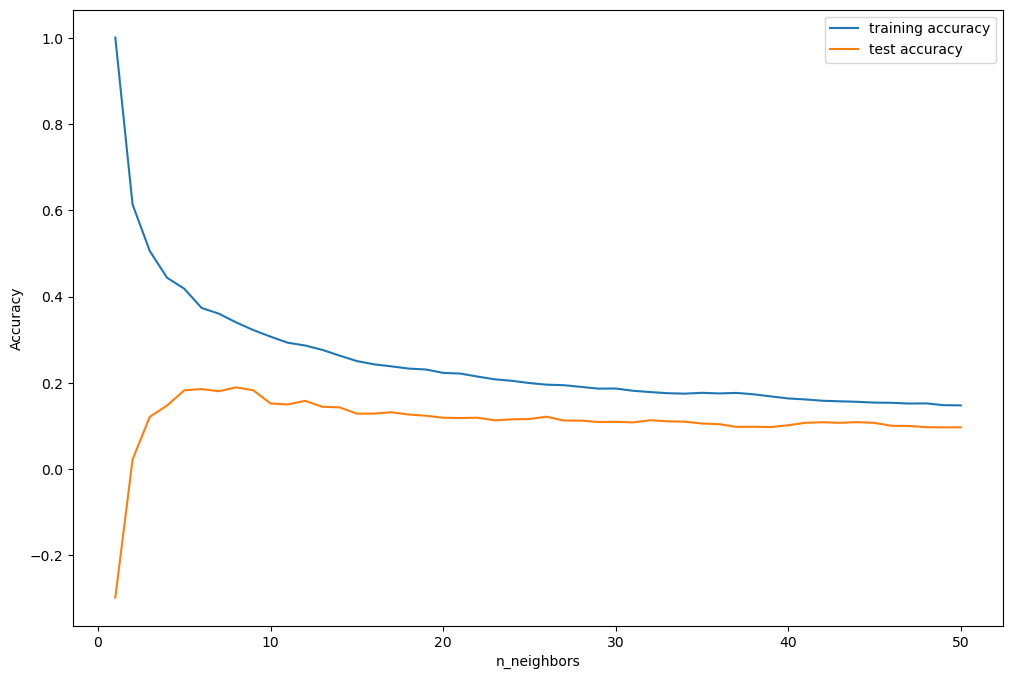

The optimal number of neighbors is 8


In [82]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_knn, y_train_knn)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_knn, y_train_knn))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_knn, y_test_knn))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors_knn = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors_knn}""")

In [84]:
# instatiating a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = 8)



# fitting the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_knn, y_train_knn)



# predicting on new data
knn_stand_pred = knn_stand_fit.predict(x_test_knn)



# scoring the results
print('KNN Training Score :',  knn_stand.score(x_train_knn, y_train_knn).round(4))
print('KNN Testing Score :',  knn_stand.score(x_test_knn, y_test_knn).round(4))

# saving scoring data for future use
knn_stand_score_train = knn_stand.score(x_train_knn, y_train_knn).round(4)
knn_stand_score_test  = knn_stand.score(x_test_knn, y_test_knn).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score : 0.3402
KNN Testing Score : 0.1895
KNN Train-Test Gap: 0.1507


With 7 neighbors, the KNN regression model shows a slight improvement in test score and a reduction in the train-test gap compared to the previous results. However, overfitting remains a concern. Therefore, I'm confident to rule this model out. Our lead is still, Ridge :D

<h3> Elastic Net Regression</h3>

In [85]:
# storing a new file
chicago_sd_sgdr = chicago_sd_knn.copy()

In [86]:
x_features_sgd = ['Temperature(F)', 'Humidity(%)', 'SolarRadiation(MJ/m2)', 'DayOfWeek', 'HourOfDay', 
                    'HolidayI', 'FunctioningDayIndicator', 'HolidayI', 'FunctioningdayI']

# prepping data for train-test split
y_data_sgd = chicago_sd_sgdr[log_y]


# removing non-numeric columns and missing values
x_data_sgd = chicago_sd_sgdr[x_features_sgd].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features_sgd = list(x_data_sgd.columns)


# train-test split (to validate the model)
x_train_sgd, x_test_sgd, y_train_sgd, y_test_sgd = train_test_split(x_data_sgd, 
                                                    y_data_sgd, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
elastic_model_name_sgd = 'Elastic Net Regression'

# model type
elastic_model_sgd = SGDRegressor()

# FITTING to the training data
elastic_model_fit_sgd = elastic_model_sgd.fit(x_train_sgd, y_train_sgd) 


# PREDICTING on new data
elastic_model_pred_sgd = elastic_model_sgd.predict(x_test_sgd)



# SCORING the results
elastic_model_train_score_sgd = elastic_model_sgd.score(x_train_sgd, y_train_sgd).round(4)
elastic_model_test_score_sgd  = elastic_model_sgd.score(x_test_sgd, y_test_sgd).round(4)
elastic_model_gap_sgd         = abs(elastic_model_train_score_sgd - elastic_model_test_score_sgd).round(4)
    

# dynamically printing results
elastic_model_summary_sgd =  f"""\
Model Name:     {elastic_model_name_sgd}
Train_Score:    {elastic_model_train_score_sgd}
Test_Score:     {elastic_model_test_score_sgd}
Train-Test Gap: {elastic_model_gap_sgd}
"""

print(elastic_model_summary_sgd)

Model Name:     Elastic Net Regression
Train_Score:    -1.877499132213526e+24
Test_Score:     -2.2007592175901743e+24
Train-Test Gap: 3.232600853766483e+23



This model has more red flags than the beach in a storm... Both the train and test scores exhibit extremely large negative values, indicating the worst model's performance so far. Also, these scores suggest that the model's predictions are significantly worse than simply predicting constant values, pointing problems with the model's ability to learn from the data. Therefore, it's automatically ruled out.

<h3> Decision Tree Regression</h3>

In [323]:
# creating a new copy of chicago
chicago_sd_dtr = chicago_sd_ridge.copy()

# creating a new copy of chicago2
chicago_test_dtr = chicago_test.copy()

In [365]:
# defining lists for our models

#################
## full models ##
#################

# x-data
x_feature = list(chicago_sd_dtr.drop(labels  = ['RENTALS', 'log_RENTALS','PreviousRentalDemand'],
                          axis    = 1))

########################
## response variables ##
########################
feature_y  = 'RENTALS'
log_y      = 'log_RENTALS'

# preparing x-data
x_data = chicago_sd_dtr[x_feature]

# preparing y-data
y_data = chicago_sd_dtr[log_y]

validation_data = chicago_test_dtr_2

In [366]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 650)


In [367]:
# first model
model_name = 'Regression Tree'

# instatiating a model object
model = DecisionTreeRegressor(max_depth = 9,          # max depth
                              min_samples_leaf = 40,  # min samples leaf
                              random_state = 700)     # randomization


# fitting to the training data
model_fit = model.fit(x_train, y_train)


# predicting on new data
model_pred = model.predict(x_test)

# scoring the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)


clean_validation = validation_data.drop(columns=['RENTALS', 'log_RENTALS', 'ID'])
#clean_validation.head()

#clean)

#validation_predictions = model.predict(clean_validation)
#print("Predictions are: ", validation_predictions)

Training Score : 0.9471
Testing Score  : 0.9519
Train-Test Gap : 0.0048


The difference between the training and testing scores is super small, even better than our top: Ridge. Let's see how this develops...

<h4> Decision Tree Tuning</h4>

In [368]:
# Declare an expanded hyperparameter space
param_dist = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),  
    'min_samples_split': np.arange(2, 20),  
    'min_samples_leaf': np.arange(1, 50),  
    'max_features': ['sqrt', 'log2', None]  
}

# Instantiate the DecisionTreeRegressor model
tuned_tree = DecisionTreeRegressor(random_state=702)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=tuned_tree,
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=11,
                                   n_jobs=-1)  # Utilize all available CPU cores

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_data, y_data)

# Print the optimal parameters and best score
print("Tuned Parameters  :", random_search.best_params_)
print("Tuned Training AUC:", random_search.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 16, 'criterion': 'friedman_mse'}
Tuned Training AUC: 0.9519


In [369]:
model_name = 'Tuned Decision Tree'
model = DecisionTreeRegressor(max_depth=16,
                              min_samples_split=3,
                              min_samples_leaf=21,
                              max_features=None,
                              criterion='friedman_mse',
                              splitter='random',
                              random_state=702)  # Use the same random state for consistency

# Fit the model to the training data
model_fit = model.fit(x_train, y_train)

# Predict on new data
model_pred = model.predict(x_test)

# Score the results
model_train_score = model.score(x_train, y_train).round(4)  # Using R-square
model_test_score = model.score(x_test, y_test).round(4)     # Using R-square
model_gap = abs(model_train_score - model_test_score).round(4)

# Display results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

x_train.head()

Training Score : 0.9438
Testing Score  : 0.9356
Train-Test Gap : 0.0082


,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,WeekendIndicator,Temperature_SolarInteraction,HolidayI,FunctioningdayI
333,86,39,3.4,6.1,54.1,0.0,0.0,1.46,0,1,9,3,15,23.7575,0,0,0,125.56,1,1
1574,48,78,5.6,12.4,41.0,0.0,0.0,0.00,0,1,10,2,18,23.1250,0,0,0,0.00,1,1
922,53,78,0.7,11.5,46.4,0.0,0.0,0.00,0,0,9,1,2,23.7000,0,0,0,0.00,1,1
1074,54,74,3.1,12.4,47.5,0.0,0.0,0.00,0,1,9,3,21,23.8750,0,0,0,0.00,1,1
1447,55,59,9.2,12.4,41.7,0.0,0.0,1.42,0,0,9,2,10,22.3400,0,0,0,78.10,1,1


Before the tunning it was better... Which make me think that, during the tuning process by using cross-validation only on the training set information lead to overfitting the set.

<h2> THE RIDGE REGRESSOR MODEL :D </h2> 

After the evaluation of different models and hyperparameter tuning, we have identified the <b>Ridge Regressor</b> as our top-performing model! This model consistently demonstrated superior predictive performance when assessing both Testing and Training Data.

The Ridge Regressor not only achieved strong and high scores, indicating its effectiveness in capturing the underlying patterns in the data, but it also exhibited a minimal Train-Test Gap. This suggests that the model generalizes well to new, unseen data, enhancing its reliability for Chicago's bike business.

Furthermore... let's see it in action

In [371]:
validation_set = chicago_test.drop(columns=[ 'ID', 'DateHour'])
#validation_set.head()
#print("Predictions: ", model_fit.predict(validation_set))
#chicago_test['RENTALS']= model_fit.predict(validation_set)
chicago_test.head()

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,Month,DayOfWeek,HourOfDay,WeatherConditions,HolidayIndicator,FunctioningDayIndicator,WeekendIndicator,Temperature_SolarInteraction,HolidayI,FunctioningdayI,RENTALS
0,mb_382,2023-09-16 20:59:58.095,73,70,5.6,9.8,65.7,0.0,0.0,0.00,0,1,9,5,20,28.01250,0,0,1,0.00,1,1,1742.266667
1,mb_547,2023-09-23 17:59:57.270,63,39,2.2,2.5,39.0,0.0,0.0,0.21,0,1,9,5,17,18.23875,0,0,1,13.23,1,1,2345.073171
2,mb_578,2023-09-25 00:59:57.115,69,54,0.2,8.6,48.6,0.0,0.0,0.00,0,1,9,0,0,22.55000,0,0,0,0.00,1,1,338.000000
3,mb_187,2023-09-08 17:59:59.070,69,43,4.0,6.2,46.9,0.0,0.0,0.26,1,1,9,4,17,21.17000,0,0,0,17.94,1,1,2345.073171
4,mb_227,2023-09-10 09:59:58.870,75,73,6.9,12.3,64.2,0.0,0.0,2.28,0,1,9,6,9,29.21000,0,0,1,171.00,1,1,1022.853659


<h3> Exporting File</h3>

In [372]:
# storing data
chicago_test_ridge = chicago_test.copy()

# kaggle file
ridge_kaggle = chicago_test.loc[:, ['ID', 'RENTALS']]

ridge_kaggle

,ID,RENTALS
0,mb_382,1742.266667
1,mb_547,2345.073171
2,mb_578,338.000000
3,mb_187,2345.073171
4,mb_227,1022.853659
...,...,...
541,mb_729,1022.853659
542,mb_767,1224.740741
543,mb_267,338.000000
544,mb_1696,1605.071429


In [374]:
ridge_kaggle.to_csv('ridge_rebeca_canales.csv', index = False)